In [ ]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib
%pip install nbformat

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [ ]:
df_data.shape

In [ ]:
df_data.columns

In [8]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

In [ ]:
df_data.duplicated().values.any()

In [ ]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


In [11]:
df_data = df_data.drop_duplicates()

In [ ]:
df_data.isna().sum()

In [ ]:
df_data[df_data.isna().any(axis=1)]

In [14]:
df_data = df_data.dropna()

In [ ]:
df_data.isna().sum()

In [ ]:
df_data.shape

In [ ]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

In [ ]:
df_data.head()

### Percentage of flats by each city

In [ ]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [ ]:
df_data['price'].describe()

In [61]:
df_filtered_outliers = df_data[(df_data.price > 100) & (df_data.price < 2000) & (df_data.area > 10)]

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=30)
plt.xlabel('Rent Price')
plt.xticks(range(0, 2000, 200))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [ ]:
df_data['area'].describe()

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [ ]:
#show all the columns
df_data.columns

### Property Count by Type

In [72]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

In [ ]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

# Create a bar plot
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [ ]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

In [ ]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


In [ ]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()

In [ ]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

In [ ]:
# Rent price change over time smoothed by a yearly moving average
df_filtered_outliers['year'] = df_filtered_outliers.datetime.dt.year

average_prices_by_year = df_filtered_outliers.groupby('year')['price'].mean()


plt.figure(figsize=(8, 4), dpi=200)
sns.lineplot(x=average_prices_by_year.index, y=average_prices_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Year')
plt.show()


In [94]:
# Drop energy class rows with the value ','

df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

In [ ]:
# Rent price based on energy class
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

In [ ]:
# Rent price based on condition
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

In [ ]:
# Average rent price based on the number of rooms
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

KeyboardInterrupt: 

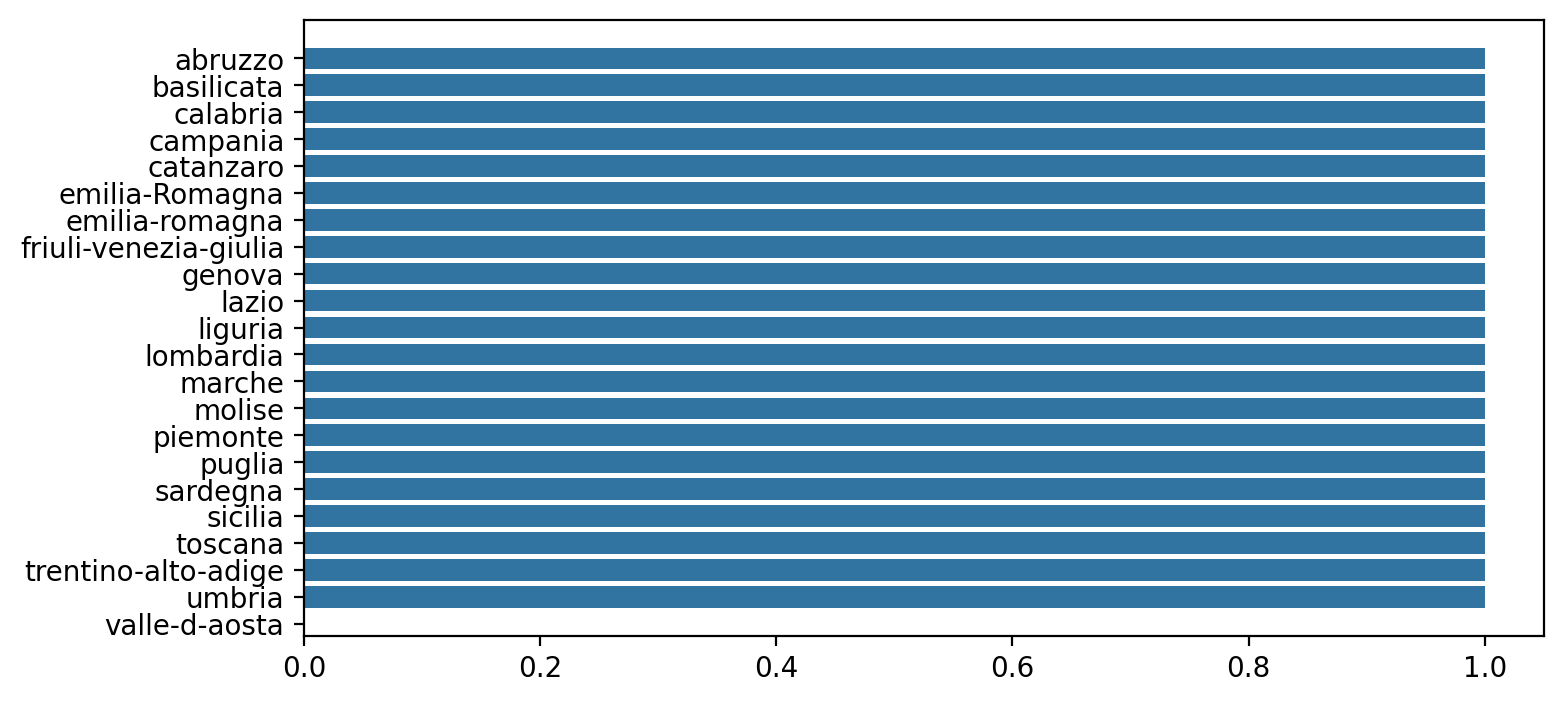

In [ ]:
# Drop the rows with 0 parking spots
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['parking spots'] != 0]

#bar plot of parking spots by region
parking_spots_by_region = df_filtered_outliers.groupby('region')['parking spots'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=parking_spots_by_region.values, y=parking_spots_by_region.index)
plt.xlabel('Region')
plt.ylabel('Average Number of Parking Spots')
plt.title('Average Number of Parking Spots by Region')
plt.show()